In [811]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [812]:
# Lecture du fichier
df = pd.read_csv('air_quality_india.csv')

In [813]:
df.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [814]:
df.shape

(36192, 6)

In [815]:
missing_values_all = df.isnull().sum()
print("Nombre de valeurs manquantes par colonne:")
print(missing_values_all)

Nombre de valeurs manquantes par colonne:
Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64


In [816]:
file = df.drop('Timestamp', axis=1)

In [817]:
df.shape

(36192, 6)

In [818]:
X = df[['Year', 'Month', 'Day', 'Hour']].values
y = df['PM2.5'].values

In [819]:
def calculer_moyenne(donnees):
   
    somme = 0
    n = len(donnees)
    for val in donnees:
        somme += val
    return somme / n

In [820]:
def calculer_ecart_type(donnees):

    moyenne = calculer_moyenne(donnees)
    somme_carres = 0
    for val in donnees:
        somme_carres += (val - moyenne) ** 2
    variance = somme_carres / len(donnees)
    return (variance) ** 0.5

In [821]:
# Extraire les colonnes pertinentes
data = df[['Year', 'Month', 'Day', 'Hour', 'PM2.5']].values

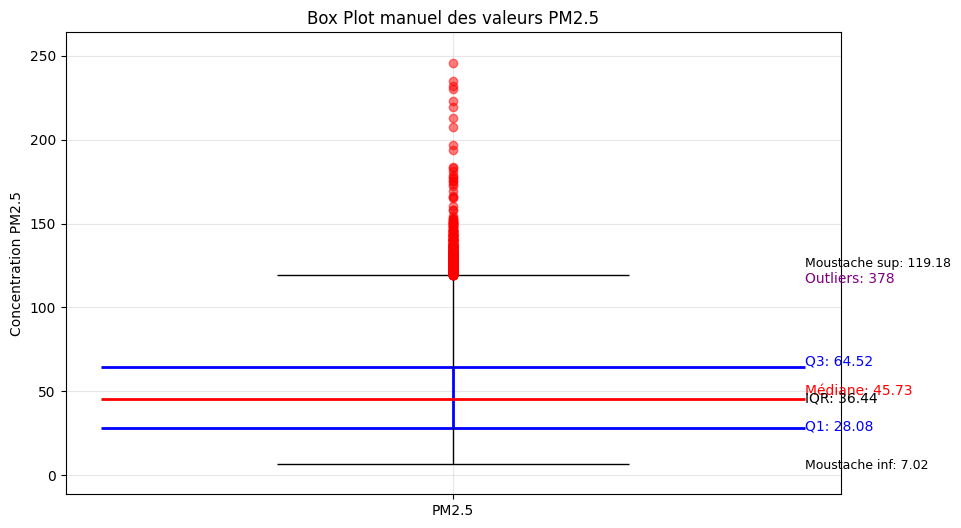

Statistiques calculées manuellement:
Q1: 28.08
Médiane: 45.73
Q3: 64.52
IQR: 36.44
Moustache inférieure: 7.02
Moustache supérieure: 119.18
Nombre d'outliers: 378


In [822]:
# Trier les données
sorted_data = np.sort(y)
n = len(sorted_data)

# 1. Calculer les quartiles manuellement
Q1_idx = int(n * 0.25)
Q2_idx = int(n * 0.5)  # médiane
Q3_idx = int(n * 0.75)

Q1 = sorted_data[Q1_idx]
median = sorted_data[Q2_idx]
Q3 = sorted_data[Q3_idx]

# 2. Calculer l'IQR (Interquartile Range)
IQR = Q3 - Q1

# 3. Calculer les moustaches selon la formule donnée
lower_whisker = max(np.min(sorted_data), Q1 - 1.5 * IQR)  # max(min, Q1 - 1.5*IQR)
upper_whisker = min(np.max(sorted_data), Q3 + 1.5 * IQR)  # min(max, Q3 + 1.5*IQR)

# 4. Identifier les outliers
outliers = sorted_data[(sorted_data < lower_whisker) | (sorted_data > upper_whisker)]

# 5. Créer le plot
plt.figure(figsize=(10, 6))

# Plot de la boîte
box_positions = [1]  # position sur l'axe x
box_width = 0.5

# Plot la boîte centrale
plt.vlines(1, Q1, Q3, color='blue', linewidth=2)  # lignes verticales de la boîte
plt.hlines([Q1, Q3], 1-box_width/2, 1+box_width/2, color='blue', linewidth=2)  # bords horizontaux de la boîte
plt.hlines(median, 1-box_width/2, 1+box_width/2, color='red', linewidth=2)  # ligne médiane

# Plot les moustaches
plt.vlines(1, lower_whisker, Q1, color='black', linestyle='-', linewidth=1)  # moustache inférieure
plt.vlines(1, Q3, upper_whisker, color='black', linestyle='-', linewidth=1)  # moustache supérieure
plt.hlines([lower_whisker, upper_whisker], 1-box_width/4, 1+box_width/4, color='black', linewidth=1)  # extrémités des moustaches

# Plot les outliers
if len(outliers) > 0:
    plt.plot([1] * len(outliers), outliers, 'ro', alpha=0.5)

# Ajustement des annotations pour éviter les chevauchements
plt.text(1.25, Q1 - 1, f'Q1: {Q1:.2f}', fontsize=10, color='blue')  # Décalé légèrement vers le bas
plt.text(1.25, median + 2, f'Médiane: {median:.2f}', fontsize=10, color='red')  # Décalé légèrement vers le haut
plt.text(1.25, Q3 + 1, f'Q3: {Q3:.2f}', fontsize=10, color='blue')  # Décalé légèrement vers le haut
plt.text(1.25, lower_whisker - 3, f'Moustache inf: {lower_whisker:.2f}', fontsize=9, color='black')  # Plus bas
plt.text(1.25, upper_whisker + 5, f'Moustache sup: {upper_whisker:.2f}', fontsize=9, color='black')  # Décalé plus haut
plt.text(1.25, np.mean([Q1, Q3]) - 3, f'IQR: {IQR:.2f}', fontsize=10, color='black')  # Légèrement en dessous pour éviter chevauchement avec la médiane

# Gestion des outliers
if len(outliers) > 0:
    plt.text(1.25, min(outliers) - 5, f'Outliers: {len(outliers)}', fontsize=10, color='purple')  # Loin des moustaches
else:
    plt.text(1.25, lower_whisker - 5, 'Outliers: 0', fontsize=10, color='purple')  # Si pas d'outliers

# Paramètres du graphique
plt.title('Box Plot manuel des valeurs PM2.5')
plt.ylabel('Concentration PM2.5')
plt.ylim(min(sorted_data) - IQR/2, max(sorted_data) + IQR/2)  # ajuster l'échelle
plt.xticks([1], ['PM2.5'])

# Afficher le graphique
plt.grid(True, alpha=0.3)
plt.show()

# Afficher les statistiques
print(f"Statistiques calculées manuellement:")
print(f"Q1: {Q1:.2f}")
print(f"Médiane: {median:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Moustache inférieure: {lower_whisker:.2f}")
print(f"Moustache supérieure: {upper_whisker:.2f}")
print(f"Nombre d'outliers: {len(outliers)}")

In [823]:
# Calculer les moyennes des colonnes
means = np.array([calculer_moyenne(data[:, i]) for i in range(data.shape[1])])

In [824]:
# Initialiser la matrice de corrélation
n = data.shape[1]  # Nombre de colonnes
correlation_matrix = np.zeros((n, n))

In [825]:
# Calculer les corrélations manuellement
for i in range(n):
    for j in range(n):
        # Numerateur : Covariance entre i et j
        covariance = np.sum((data[:, i] - means[i]) * (data[:, j] - means[j]))
        
        # Dénominateur : Produit des écarts-types
        std_i = np.sqrt(np.sum((data[:, i] - means[i])**2))
        std_j = np.sqrt(np.sum((data[:, j] - means[j])**2))
        
        # Coefficient de corrélation
        correlation_matrix[i, j] = covariance / (std_i * std_j)

In [826]:
# Afficher la matrice de corrélation
print("Matrice de corrélation :")
for row in correlation_matrix:
    print(["{:.2f}".format(x) for x in row])


Matrice de corrélation :
['1.00', '-0.24', '0.01', '-0.00', '-0.22']
['-0.24', '1.00', '0.01', '-0.00', '0.00']
['0.01', '0.01', '1.00', '0.00', '-0.02']
['-0.00', '-0.00', '0.00', '1.00', '0.05']
['-0.22', '0.00', '-0.02', '0.05', '1.00']


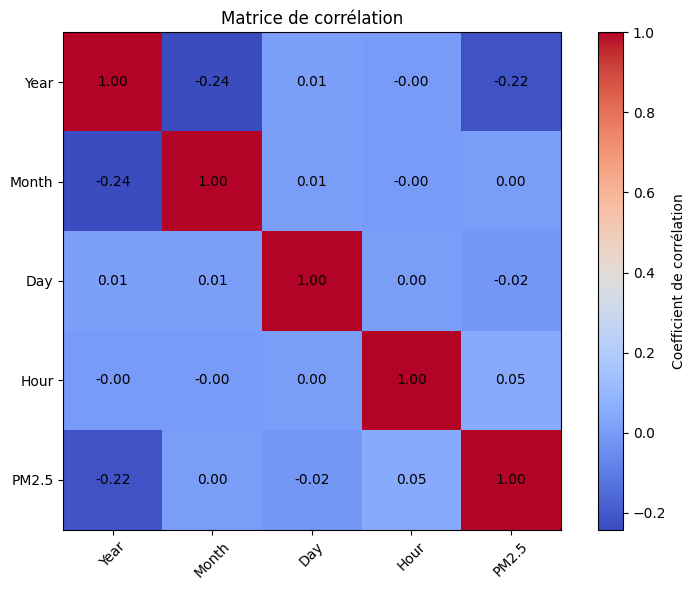

In [827]:
# Visualisation avec matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Coefficient de corrélation')
plt.title('Matrice de corrélation')

# Ajouter les labels des colonnes
labels = ['Year', 'Month', 'Day', 'Hour', 'PM2.5']
plt.xticks(ticks=np.arange(n), labels=labels, rotation=45)
plt.yticks(ticks=np.arange(n), labels=labels)

# Ajouter les valeurs dans la matrice
for i in range(n):
    for j in range(n):
        plt.text(j, i, f"{correlation_matrix[i, j]:.2f}",
                 ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

In [828]:
import numpy as np

def manual_k_fold(X, y, n_splits=10, shuffle=True):
    """
    Implémentation manuelle de la validation croisée K-Fold sans utiliser append.
    Paramètres :
        X (numpy array) : Les features (données indépendantes).
        y (numpy array) : La cible (donnée dépendante).
        n_splits (int) : Le nombre de folds.
        shuffle (bool) : Si True, les données seront mélangées avant d'être divisées.
    Retourne :
        Un tableau numpy de tuples (train_indices, test_indices) pour chaque fold.
    """
    n_samples = len(X)
    indices = np.arange(n_samples)
    
    if shuffle:
        np.random.shuffle(indices)
    
    # Pré-allouer le tableau de résultats
    folds = np.empty(n_splits, dtype=object)
    
    # Calculer la taille de base des folds et le reste
    fold_size = n_samples // n_splits
    remainder = n_samples % n_splits
    
    # Variables pour suivre la position courante
    current = 0
    
    # Créer un masque booléen pour la sélection des indices
    for i in range(n_splits):
        # Ajuster la taille du fold si nécessaire
        current_fold_size = fold_size + (1 if i < remainder else 0)
        
        # Créer un masque pour les indices de test
        test_mask = np.zeros(n_samples, dtype=bool)
        test_mask[current:current + current_fold_size] = True
        
        # Sélectionner les indices
        test_indices = indices[test_mask]
        train_indices = indices[~test_mask]
        
        # Stocker les indices dans le tableau pré-alloué
        folds[i] = (train_indices, test_indices)
        
        # Mettre à jour la position courante
        current += current_fold_size
    
    return folds

In [829]:
# Initialiser le nombre de folds
n_splits = 10

    # Obtenir les indices pour chaque fold en utilisant notre fonction manuelle
folds = manual_k_fold(X, y, n_splits=10, shuffle=True)

    # Variables pour stocker les résultats
fold = 1  # Compteur de folds

    # Boucle à travers chaque split
for train_indices, test_indices in folds:
        # Séparer les données en train et test en utilisant les indices
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        # Afficher les dimensions des ensembles pour chaque fold
        print(f"Fold {fold}:")
        print(f"  Train set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
        print(f"  Test set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")
        print("-" * 40)
        
        fold += 1

Fold 1:
  Train set: X_train shape = (32572, 4), y_train shape = (32572,)
  Test set: X_test shape = (3620, 4), y_test shape = (3620,)
----------------------------------------
Fold 2:
  Train set: X_train shape = (32572, 4), y_train shape = (32572,)
  Test set: X_test shape = (3620, 4), y_test shape = (3620,)
----------------------------------------
Fold 3:
  Train set: X_train shape = (32573, 4), y_train shape = (32573,)
  Test set: X_test shape = (3619, 4), y_test shape = (3619,)
----------------------------------------
Fold 4:
  Train set: X_train shape = (32573, 4), y_train shape = (32573,)
  Test set: X_test shape = (3619, 4), y_test shape = (3619,)
----------------------------------------
Fold 5:
  Train set: X_train shape = (32573, 4), y_train shape = (32573,)
  Test set: X_test shape = (3619, 4), y_test shape = (3619,)
----------------------------------------
Fold 6:
  Train set: X_train shape = (32573, 4), y_train shape = (32573,)
  Test set: X_test shape = (3619, 4), y_test s

In [830]:
X = df[['Year', 'Month', 'Day', 'Hour']].values
y = df['PM2.5'].values

def calculer_min_max(donnees):
    """
    Calcule le minimum et le maximum d'une série de données
    """
    min_val = min(donnees)
    max_val = max(donnees)
    return min_val, max_val

def normaliser_donnees_minmax(donnees):
    """
    Normalisation min-max : (x - min) / (max - min)
    Ramène les données entre 0 et 1
    """
    min_val, max_val = calculer_min_max(donnees)
    
    # Si toutes les valeurs sont identiques, retourner des zéros
    if max_val == min_val:
        return [0 for _ in donnees]
        
    # Normalisation min-max
    return [(x - min_val) / (max_val - min_val) for x in donnees]

# Normaliser chaque colonne de X
X_normalized = np.array([normaliser_donnees_minmax(X[:, i]) for i in range(X.shape[1])]).T

# Normaliser y (la cible) si nécessaire
y_normalized = normaliser_donnees_minmax(y)

In [831]:
def linear_regression(X, y):
    X_b = np.hstack([X, np.ones((X.shape[0], 1))])  # Ajouter la colonne de biais
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # Formule analytique
    return theta
def predict(X, theta):
    X_b = np.hstack([X, np.ones((X.shape[0], 1))])
    return X_b @ theta

In [832]:
# Fonction de prédiction
def predict(X, theta):
    X_b = np.hstack([X, np.ones((X.shape[0], 1))])
    return X_b @ theta

# Calcul du MSE (Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calcul du RMSE (Root Mean Squared Error)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

MSE: 587.9210
RMSE: 24.2471


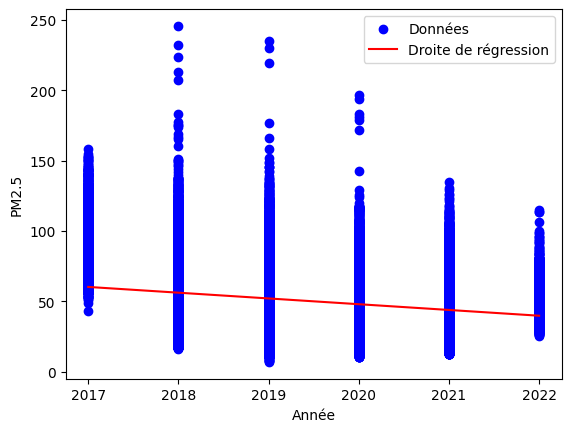

In [833]:
# Appliquer la régression linéaire sur tes données
X = df['Year'].values.reshape(-1, 1)  # Assurer que X est une matrice 2D
y = df['PM2.5'].values  # Valeurs PM2.5

# Appliquer la régression linéaire
theta = linear_regression(X, y)

# Prédictions
y_pred = predict(X, theta)

# Calcul du MSE et RMSE
mse = mean_squared_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

# Affichage de la droite de régression
plt.scatter(X, y, color='blue', label='Données')
plt.plot(X, y_pred, color='red', label='Droite de régression')
plt.xlabel('Année')
plt.ylabel('PM2.5')
plt.legend()
plt.show()